In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import cross_val_score,StratifiedKFold
from itertools import cycle
import xlsxwriter
from pandas import DataFrame

In [13]:
data_2 = pd.ExcelFile('C:\\Users\\Jyotishman Parasar\\DataanalysisChallenge\\build progress_ext.xlsx')
df1 = data_2.parse('Sheet1')
df1

,Unnamed: 0,V1,PERMITS_SUBMITTED_ACTUAL,PERMITS_RECEIVED_ACTUAL,CABLE_PLACED_ACT,SPLICE_AND_TEST_ACT,ACTUAL_VALUE,MILES_FLAG,MILEAGE_TYPE,MARKET_ID,fqn_id
0,1728,1728,2020-08-07,NaT,NaT,NaT,0.00322,New,NaN,67,1696
1,1761,1761,2020-07-16,NaT,NaT,NaT,0.00000,New,NaN,68,1729
2,1763,1763,2020-04-27,NaT,NaT,NaT,2.04447,New,NaN,69,1731
3,1960,1960,2020-07-30,NaT,NaT,NaT,0.00000,New,NaN,68,1928
4,1971,1971,2020-08-24,NaT,NaT,NaT,0.00000,New,NaN,68,1939
...,...,...,...,...,...,...,...,...,...,...,...
75460,1046259,1046259,NaT,NaT,2020-04-17 04:00:00,NaT,0.07230,New,New Mileage by primary vendor,68,337937
75461,1046260,1046260,NaT,NaT,2020-04-17 04:00:00,NaT,0.18040,New,New Mileage by primary vendor,68,337938
75462,1046261,1046261,NaT,NaT,2019-08-31 04:00:00,NaT,-1.31530,New,New Mileage by primary vendor,68,202936
75463,1046262,1046262,NaT,NaT,2020-04-17 04:00:00,NaT,0.03630,New,New Mileage by primary vendor,68,318973


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75465 entries, 0 to 75464
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                75465 non-null  int64         
 1   V1                        75465 non-null  int64         
 2   PERMITS_SUBMITTED_ACTUAL  10107 non-null  datetime64[ns]
 3   PERMITS_RECEIVED_ACTUAL   8640 non-null   datetime64[ns]
 4   CABLE_PLACED_ACT          22182 non-null  datetime64[ns]
 5   SPLICE_AND_TEST_ACT       12106 non-null  datetime64[ns]
 6   ACTUAL_VALUE              75451 non-null  float64       
 7   MILES_FLAG                75465 non-null  object        
 8   MILEAGE_TYPE              31837 non-null  object        
 9   MARKET_ID                 75465 non-null  int64         
 10  fqn_id                    75465 non-null  int64         
dtypes: datetime64[ns](4), float64(1), int64(4), object(2)
memory usage: 6.3+ MB


In [15]:
##df2 = df1.drop(['PERMITS_SUBMITTED_ACTUAL','PERMITS_RECEIVED_ACTUAL'], axis=1)

In [16]:
df2['SPLICE_AND_TEST_ACT'] = df2['SPLICE_AND_TEST_ACT'].fillna(value = 'NA')
df2['CABLE_PLACED_ACT'] = df2['CABLE_PLACED_ACT'].fillna(value = 'NA')
df2['PERMITS_SUBMITTED_ACTUAL'] = df2['CABLE_PLACED_ACT'].fillna(value = 'NA')
df2['PERMITS_RECEIVED_ACTUAL'] = df2['CABLE_PLACED_ACT'].fillna(value = 'NA')

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4997 entries, 0 to 4996
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                4997 non-null   int64  
 1   V1                        4997 non-null   int64  
 2   CABLE_PLACED_ACT          4997 non-null   object 
 3   SPLICE_AND_TEST_ACT       4997 non-null   object 
 4   ACTUAL_VALUE              4997 non-null   float64
 5   MILES_FLAG                4997 non-null   object 
 6   MILEAGE_TYPE              4997 non-null   object 
 7   MARKET_ID                 4997 non-null   int64  
 8   fqn_id                    4997 non-null   int64  
 9   PERMITS_SUBMITTED_ACTUAL  4997 non-null   object 
 10  PERMITS_RECEIVED_ACTUAL   4997 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 429.6+ KB


In [23]:
print(df2['MILEAGE_TYPE'].value_counts())

New Mileage by BAU/3RD Party vendor    2667
New Mileage by primary vendor          1943
Existing                                285
New by WOW                               58
New by XO (NEXTLINK)                     44
Name: MILEAGE_TYPE, dtype: int64


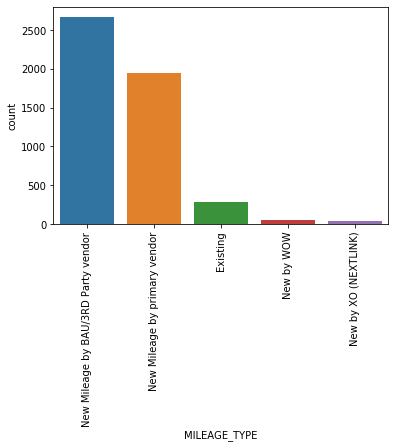

In [9]:
plt.xticks(rotation=90)
sns.countplot(x= 'MILEAGE_TYPE', data = df2)

In [24]:
print(df2['MARKET_ID'].value_counts())

69    554
1     279
35    266
36    259
28    217
     ... 
93      3
71      3
53      2
97      1
47      1
Name: MARKET_ID, Length: 86, dtype: int64
